## Final Project Submission

Please fill out:
* Student name: Andi Osika
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# Project Description:

The dataset for this project was provided to us: "kc_house_data.csv", to explore and model with multivariate linear regression to predict the sale price of houses as accurately as possible. 



# Obtain: Import Tools /  Data

This particular dataset was provided for this project and included

In [63]:
##import necessary tools and data

!pip install -U fsds_100719
from fsds_100719.imports import *
##Loads 
#Handle	Package	Description
#dp	IPython.display	Display modules with helpful display and clearing commands.
#fs	fsds_100719	Custom data science bootcamp student package
#mpl	matplotlib	Matplotlib's base OOP module with formatting artists
#plt	matplotlib.pyplot	Matplotlib's matlab-like plotting module
#np	numpy	scientific computing with Python
#pd	pandas	High performance data structures and tools
#sns	seaborn	High-level data visualization library based on matplotlib

kc = pd.read_csv("kc_house_data.csv")


Requirement already up-to-date: fsds_100719 in c:\users\aosika\appdata\local\continuum\anaconda3\envs\learn-env\lib\site-packages (0.4.20)


In [64]:
pd.set_option('display.max_columns',0)

# Examine the Data

In [65]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [66]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Notes:
Upon initial inspection, one can determine this dataset contains 21 columns containing various types of values in each ranging from objects, to numeric both as integers and floats.  Some columns that are labeled year are carrying values as float and integers and will need to be converted. Out of the 21,597 rows of data, there are a three missing values including:
-waterfront
-view
-yr_renovated

The next step would be to further inspect the values in each column to validate assumptions and determine what the corresponding values indicate or measure.

By doing a quick search on the zip codes and title of the file one can determine that this is a dataset for real estate information in King County, Washington.  This county includes Washington state's largest cities including Seattle, Kirkland, Renton, Bellevue as well as some small and remote areas including islands and those in mountain ranges.

Also looked here for some initial background: https://www.kingcounty.gov/depts/assessor.aspx

In [67]:
# Further inspecting the data:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Looked at variables to gain insight to their meaning:  https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r


Some variables weren't searchable  (go back and cross reference put an ** next to assumed

id - Unique ID for each home sold

date - Date of the home sale

price - Price of each home sold

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower

sqft_living - Square footage of the apartments interior living space

sqft_lot - Square footage of the land space

floors - Number of floors

  X waterfront - A binary variable that seems to be proven not applicable only .06% of this was marked as a true value

view - An index assigned on a scale from 0 to 4 of how good the view of the property

condition - An index from 1 to 5 on the condition of the apartment,

grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

sqft_above - The square footage of the interior housing space that is above ground level

sqft_basement - The square footage of the interior housing space that is below ground level

yr_built - The year the house was initially built

   X yr_renovated - The year of the house’s last renovation

zipcode - What zipcode area the house is in

lat - Lattitude

long - Longitude

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


In [68]:
## initial thoughts... is lat/long redundant for location with zip code?
### age vs reno? how would I deal with that?

## Function to help investigate specific columns

In [69]:
def check_column(df, col_name, n_unique=10):
    """Displays info on null values, datatype, unqiue values
    and displays .describe()
    
    Args:
        df (df): contains the columns
        col_name (str): name of the df column to show
        n_unique (int): Number of unique values top show.
    
    Return:
        fig, ax (Matplotlib Figure and Axes)
    """
    
    print('DataType:')
    print('\t',df[col_name].dtypes)
    
    num_nulls = df[col_name].isna().sum()
    print(f'Null Values Present = {num_nulls}')
    
    display(df[col_name].describe().round(3))
    
    print('\nValue Counts:')
    display(df[col_name].value_counts(n_unique))
    
    ## Add some EDA figures
    fig, ax = plt.subplots(ncols=2)
    
    return fig,ax

#check_column(df,'condition')

# SCRUB: Initial Data Cleaning

In [70]:
display(kc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

In [71]:
## Initial changes to convert objects into useable data:

# 1) date from object to date time:
kc['date'] = pd.to_datetime(kc['date'])

# 2) date from int to date time:

kc['yr_built'] = pd.to_datetime(kc['yr_built'], format=('%Y'))

# 3) change sqft_basement to into numeric value
kc['sqft_basement'] = pd.to_numeric(kc['sqft_basement'],errors='coerce')


**Year Renovated** is a column that will be interesting to handle for two reasons.  Not only is it a float (number with decimals) that should be converted into a date to reflect it's intended value, it contains 3842 null values.  All homes that are sold are not renovated.  Homes can be a new build or simply an old home.   

This could effect sale prices even though from some very high level research demonstrates it's not always the case:


https://www.investopedia.com/articles/mortgages-real-estate/08/add-value-to-real-estate.asp
https://www.homeadvisor.com/r/raise-the-value-of-your-home-with-these-remodeling-tips/
https://www.nolo.com/legal-encyclopedia/do-home-improvements-really-add-30020.html

DataType:
	 float64
Null Values Present = 3842


count    17755.000
mean        83.637
std        399.946
min          0.000
25%          0.000
50%          0.000
75%          0.000
max       2015.000
Name: yr_renovated, dtype: float64


Value Counts:


0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

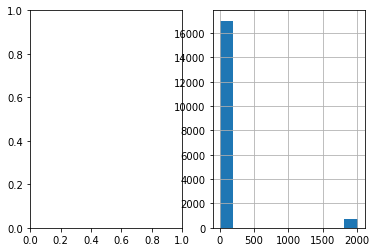

In [72]:
check_column(kc, 'yr_renovated')
kc['yr_renovated'].hist()


In [73]:
kc['yr_renovated'].fillna(0, inplace=True)

In [74]:
import math
kc['yr_reno'] = kc['yr_renovated'].apply(lambda x:math.trunc(x))

In [75]:
kc['yr_reno'].value_counts()

0       20853
2014       73
2003       31
2013       31
2007       30
        ...  
1976        1
1953        1
1951        1
1946        1
1944        1
Name: yr_reno, Length: 70, dtype: int64

In [76]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955-01-01,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951-01-01,1991.0,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933-01-01,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965-01-01,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987-01-01,0.0,98074,47.6168,-122.045,1800,7503,0


In [77]:
kc['yr_built'] = kc['yr_built'].apply(lambda x: x.year)

In [78]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [79]:
kc['last_upgrade'] = np.where(kc['yr_reno']==0, kc['yr_built'], kc['yr_reno'])

In [80]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno,last_upgrade
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,1955
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,1933
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,1965
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1987


In [81]:
kc['yr_renovated'].describe()

count    21597.000000
mean        68.758207
std        364.037499
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [82]:
kc.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno,last_upgrade
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,1955
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,1933
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,1965
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1987
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,0,2001
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819,0,1995
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,0,1963
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,0,1960
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,0,2003


In [83]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21143 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
yr_reno          21597 non-null int64
last_upgrade     21597 non-n

In [84]:
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno,last_upgrade
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,1955
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1991,1991
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,1933
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0,1965
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,1987


In [85]:
duplicates = kc[kc.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno,last_upgrade


## Dealing with Null Values

In [86]:
## Looking for null values:
nulls = kc.isnull().sum()
print(nulls[nulls > 0])

waterfront       2376
view               63
sqft_basement     454
dtype: int64


In [87]:
#Examining missing data in terms of percentages
kc.isnull().sum() / len(kc.index)

id               0.000000
date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.000000
waterfront       0.110015
view             0.002917
condition        0.000000
grade            0.000000
sqft_above       0.000000
sqft_basement    0.021021
yr_built         0.000000
yr_renovated     0.000000
zipcode          0.000000
lat              0.000000
long             0.000000
sqft_living15    0.000000
sqft_lot15       0.000000
yr_reno          0.000000
last_upgrade     0.000000
dtype: float64

### Dropping the null values 'view' and 'sft_basement' since they are insignificant @.02%, and 2% respectively is appropriate and preserves a good majority of overall data.

In [88]:
#it wold be acceptable to drop values for view and sft_basement since they are insignificant @.02%, and 2% respectively
kc.dropna(subset= ['view'], inplace=True)
kc.dropna(subset=['sqft_basement'], inplace=True)

In [89]:
##curious about yr_renovated... not all homes were/are renovated exploring:
kc['yr_renovated'].describe()

count    21082.000000
mean        68.359359
std        363.029573
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [90]:
kc.drop('yr_renovated', axis=1, inplace=True)

### Dropping the variable "waterfront" based on the fact that only .06% of this data was populated with a binary value of 1 for this field.  Considering that King County sits on many bodies of water, including Puget Sound, 33 lakes and multiple rivers https://en.wikipedia.org/wiki/Category:Lakes_of_King_County,_Washington 


In [91]:
##next missing value set: watherfront
kc['waterfront'].describe()

count    18749.000000
mean         0.007520
std          0.086396
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [92]:
##'waterfront' appears to be a binary value, so it wouldn't make sense to fill value with mean.It might make sense 
#to populate with zeros since if a property was 'waterfront', it would be marked as such.
#since it tends to be more than 10% of the data, exploring further to see if there are any contextual clues that
#may indicate 'waterfront'

In [93]:
kc['waterfront'].value_counts() / len(kc.index)

0.0    0.882649
1.0    0.006688
Name: waterfront, dtype: float64

In [94]:
#dropping the waterfront column
kc.drop('waterfront', axis=1, inplace=True)

In [95]:
##all null values are clear
kc.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
yr_reno          0
last_upgrade     0
dtype: int64

# Explore: Further Data Inspection

In [96]:
kc.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,yr_reno,last_upgrade
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.233327,3.409828,7.657717,1789.000000,291.359975,1971.023337,98077.858837,47.560371,-122.213843,1986.917418,12732.514135,68.359359,1972.950005
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.765066,0.650597,1.173690,828.369355,442.007858,29.323120,53.528769,0.138568,0.140607,685.544250,27148.781580,363.029573,28.905522
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1900.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000,0.000000,1954.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000,0.000000,1977.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000,0.000000,1999.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,2015.000000


## Visual Inspections to identify data types:
    Evaluating data to determine if it is numeric or categorical in nature

### Initial Histograms: 

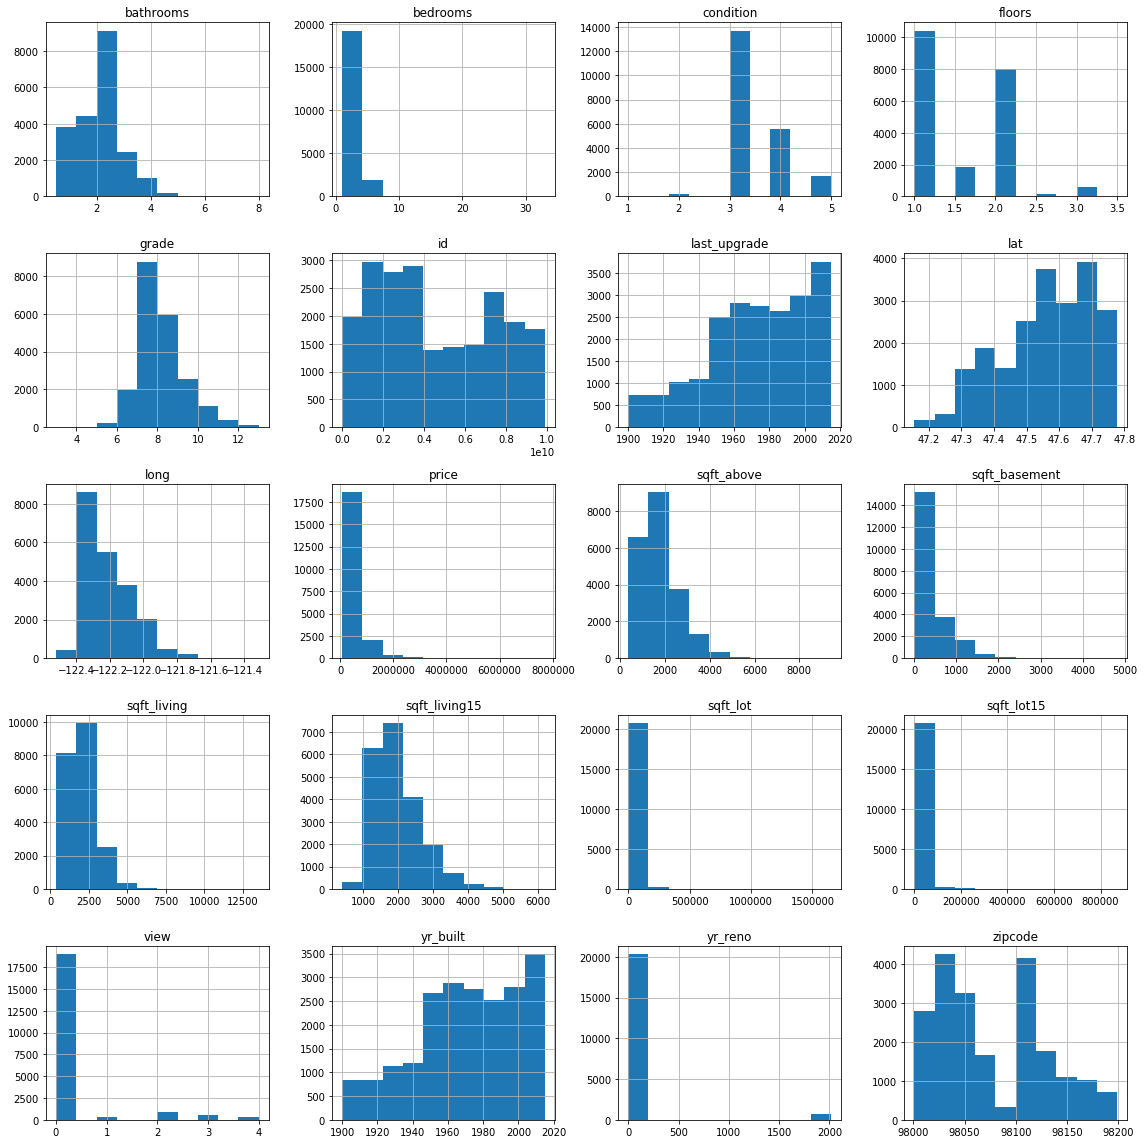

In [97]:
kc.hist(figsize=(16,16));
plt.tight_layout()

### Initial Scatter Matrix

In [98]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,16)

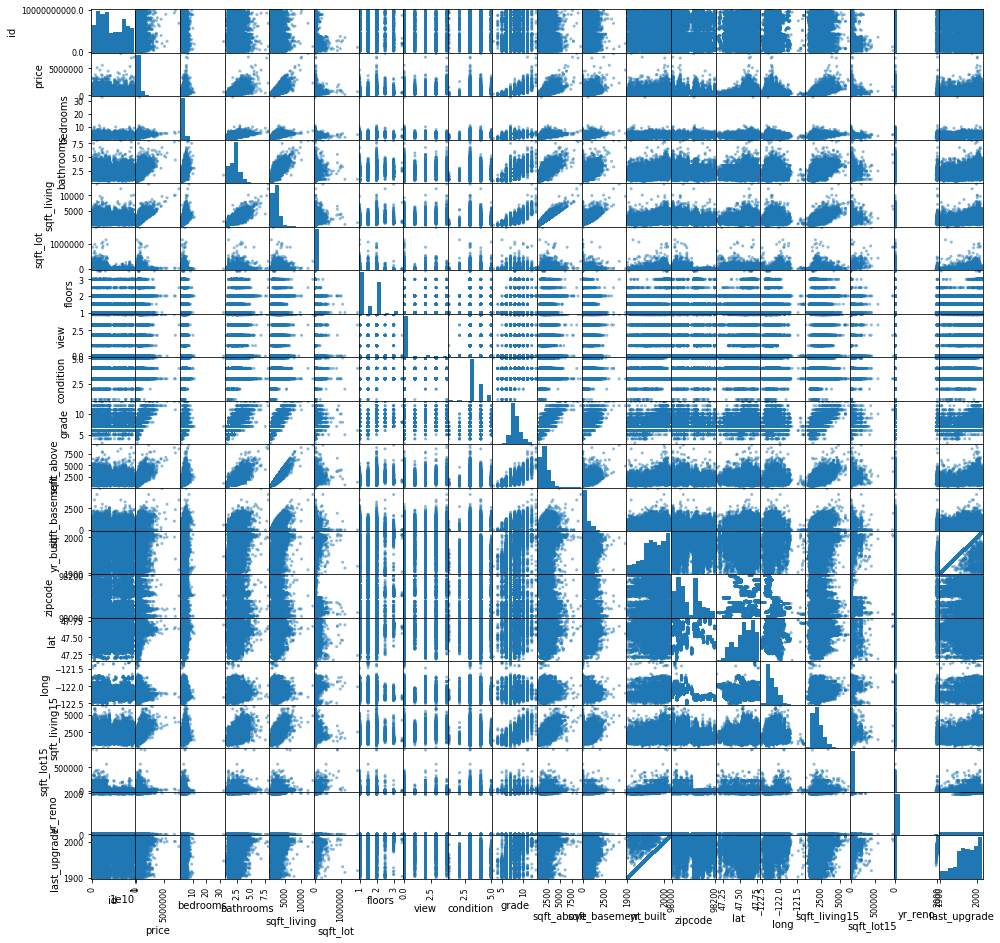

In [99]:
pd.plotting.scatter_matrix(kc);

In looking at data, **decide to drop ID** - this is a unique identifier that is assigned after a home is listed and who's purpose is to track the individual record rather than to quantify attributes of a property.


### Also in viewing the scatter plot several categories demonstrate categorical patterns.


In [100]:
#dropping the waterfront column
kc.drop('id', axis=1, inplace=True)

###  Inspecting columns that could be categorical data :
    - floors -assigned category code
    - view - assigned category code
    - condition - assigned category code
    - grade - assigned category code
    - zipcode -**binning? category code?**


In [101]:
kc['floors'].describe()

count    21082.00000
mean         1.49362
std          0.53937
min          1.00000
25%          1.00000
50%          1.50000
75%          2.00000
max          3.50000
Name: floors, dtype: float64

In [102]:
cat_floors = kc['floors'].astype('category')
coded_floors = cat_floors.cat.codes
kc['floors'] = coded_floors

In [103]:
kc['view'].describe()

count    21082.000000
mean         0.233327
std          0.765066
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [104]:
kc['view'].value_counts()

0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64

In [105]:
cat_view = kc['view'].astype('category')
coded_view = cat_view.cat.codes
kc['view'] = coded_view

In [106]:
kc['condition'].describe()

count    21082.000000
mean         3.409828
std          0.650597
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

In [107]:
kc['condition'].value_counts()

3    13688
4     5538
5     1662
2      166
1       28
Name: condition, dtype: int64

In [108]:
cat_condition = kc['condition'].astype('category')
coded_condition = cat_condition.cat.codes
kc['condition'] = coded_condition

In [109]:
kc['grade'].describe()

count    21082.000000
mean         7.657717
std          1.173690
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [110]:
kc['grade'].value_counts()

7     8762
8     5922
9     2546
6     1991
10    1108
11     389
5      235
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [111]:
cat_grade = kc['grade'].astype('category')
coded_grade = cat_grade.cat.codes
kc['grade'] = coded_grade

In [112]:
kc['zipcode'].value_counts()

98103    587
98038    571
98115    565
98052    561
98117    541
        ... 
98102    100
98010     98
98024     78
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

In [113]:
#there are 70 zip codes, are these categorical values? looking at histogram for more information
#on how to categorize zip codes
kc['zipcode'].describe()

count    21082.000000
mean     98077.858837
std         53.528769
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98117.000000
max      98199.000000
Name: zipcode, dtype: float64

In [114]:
import plotly.graph_objects as go

In [115]:
import plotly.express as px

In [ ]:
px.hist(kc[])

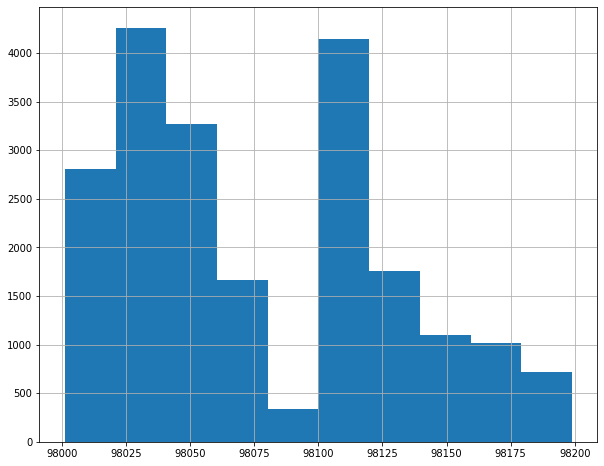

In [37]:
kc['zipcode'].hist(figsize=(10,8))

In [38]:
##upon inspection, one idea is that zip codes appear to have some sort of 
#continuous values that could be binned into 10 ?

In [39]:
int_zipcode = kc['zipcode'].astype('str').astype('int')

In [40]:
bins = [98000, 98020, 98040, 98060, 98080, 98100, 98120, 98140, 98160, 98177, 98200]

In [41]:
bins_zip = pd.cut(kc['zipcode'].astype('str').astype('float'), bins)
bins_zip = bins_zip.cat.as_ordered()
bins_zip.head()

0    (98177, 98200]
1    (98120, 98140]
2    (98020, 98040]
3    (98120, 98140]
4    (98060, 98080]
Name: zipcode, dtype: category
Categories (10, interval[int64]): [(98000, 98020] < (98020, 98040] < (98040, 98060] < (98060, 98080] ... (98120, 98140] < (98140, 98160] < (98160, 98177] < (98177, 98200]]

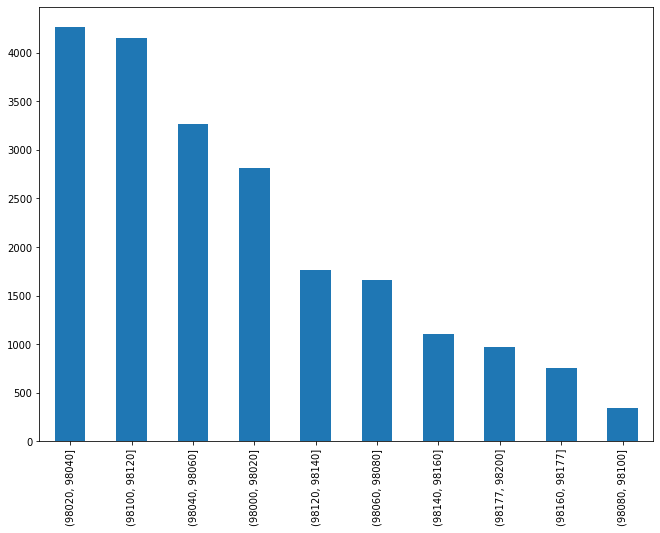

In [42]:
bins_zip.value_counts().plot(kind='bar', figsize=(11,8))

In [43]:
kc['zip_bins'] = bins_zip

In [44]:
cat_zip_bins1 = kc['zip_bins'].astype('category')
coded_zip_bins1 = cat_zip_bins1.cat.codes
kc['zip_bins'] = coded_zip_bins1

In [45]:
display(kc.head())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zip_bins
0,2014-10-13,221900.0,3,1.00,1180,5650,0,0,2,4,1180,0.0,1970-01-01 00:00:00.000001955,98178,47.5112,-122.257,1340,5650,9
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,2,4,2170,400.0,1970-01-01 00:00:00.000001951,98125,47.7210,-122.319,1690,7639,6
2,2015-02-25,180000.0,2,1.00,770,10000,0,0,2,3,770,0.0,1970-01-01 00:00:00.000001933,98028,47.7379,-122.233,2720,8062,1
3,2014-12-09,604000.0,4,3.00,1960,5000,0,0,4,4,1050,910.0,1970-01-01 00:00:00.000001965,98136,47.5208,-122.393,1360,5000,6
4,2015-02-18,510000.0,3,2.00,1680,8080,0,0,2,5,1680,0.0,1970-01-01 00:00:00.000001987,98074,47.6168,-122.045,1800,7503,3


Also creating a categorical codes for zip to compare to evaluate the difference with 70 different categories

In [46]:
cat_zip = kc['zipcode'].astype('category')
coded_zip = cat_zip.cat.codes
kc['zip_cats'] = coded_zip

In [47]:
display(kc.head())

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,zip_bins,zip_cats
0,2014-10-13,221900.0,3,1.00,1180,5650,0,0,2,4,1180,0.0,1970-01-01 00:00:00.000001955,98178,47.5112,-122.257,1340,5650,9,66
1,2014-12-09,538000.0,3,2.25,2570,7242,2,0,2,4,2170,400.0,1970-01-01 00:00:00.000001951,98125,47.7210,-122.319,1690,7639,6,55
2,2015-02-25,180000.0,2,1.00,770,10000,0,0,2,3,770,0.0,1970-01-01 00:00:00.000001933,98028,47.7379,-122.233,2720,8062,1,16
3,2014-12-09,604000.0,4,3.00,1960,5000,0,0,4,4,1050,910.0,1970-01-01 00:00:00.000001965,98136,47.5208,-122.393,1360,5000,6,58
4,2015-02-18,510000.0,3,2.00,1680,8080,0,0,2,5,1680,0.0,1970-01-01 00:00:00.000001987,98074,47.6168,-122.045,1800,7503,3,37


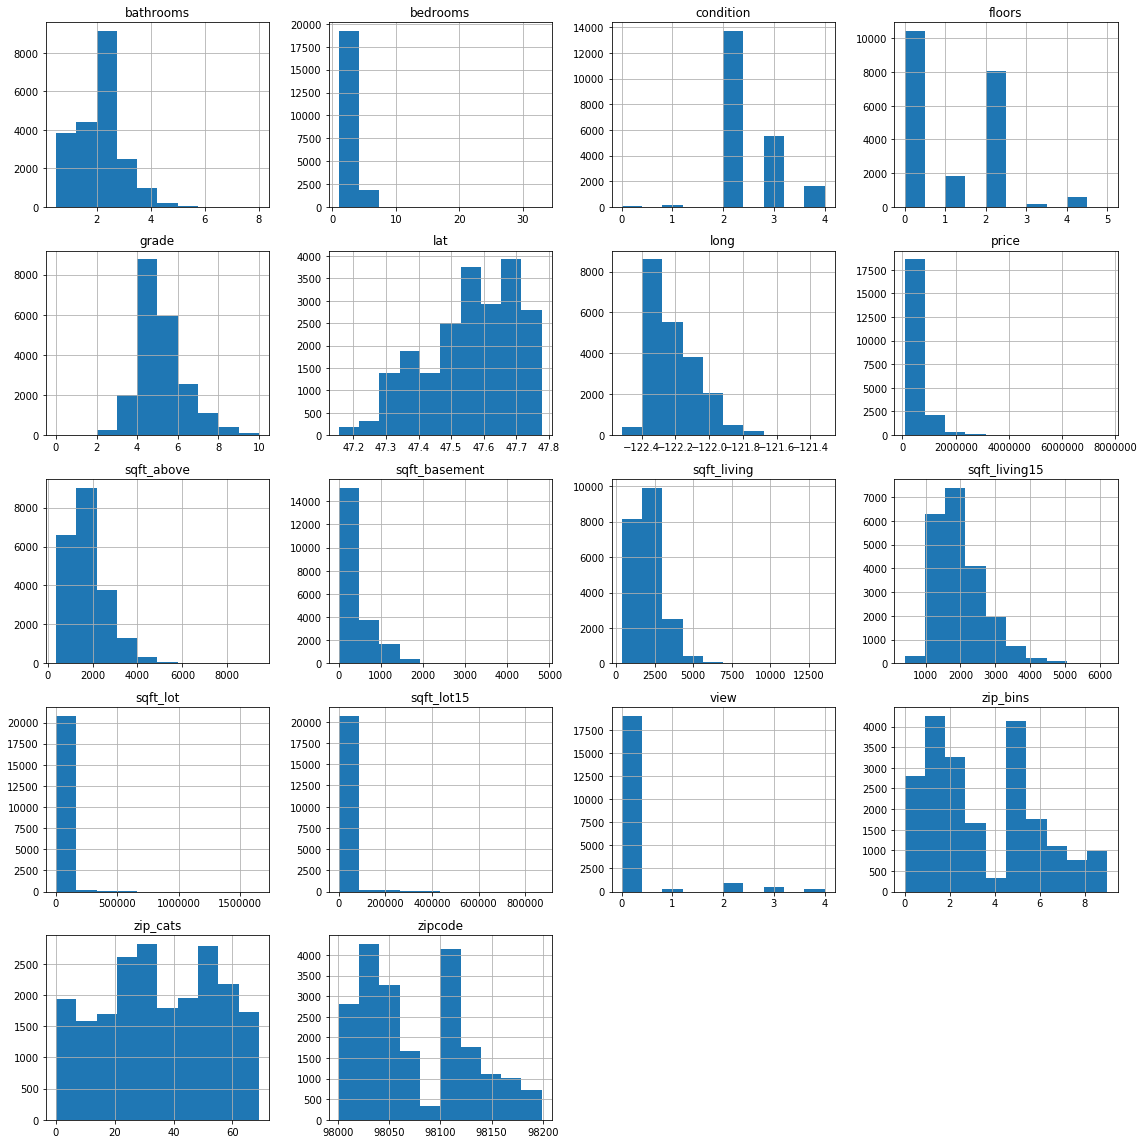

In [48]:
kc.hist();
plt.tight_layout()

## Multicollinearity

Categorical Inspection:

In [ ]:
cols_to_plot ['floors', 'view', 'condition', 'grade', 'zipcode']

fig, axes = plt.subplots(nrows=1,ncols=5)

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=df[col], y=df['price'])

In [ ]:
cols_to_plot ['floors', 'view', 'condition', 'grade', 'zipcode']

fig, axes = plt.subplots(nrows=1,ncols=5)

for i, col in enumerate(cols_to_plot):
    axes[i].scatter(x=df[col], y=df['price'])

Looking for things that may correlate and might not add anything to the model 

Thoughts:
    
    1) Are zip and long/lat redundant?
    2) 
    
    2) Looking for high correlations before transforming/modifying the data or making decisions

In [49]:
corr = kc.corr().round(3)
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,zip_bins,zip_cats
price,1.000,0.308,0.525,0.702,0.088,0.257,0.397,0.035,0.668,0.605,0.323,-0.053,0.308,0.023,0.586,0.084,-0.064,-0.052
bedrooms,0.308,1.000,0.514,0.578,0.033,0.179,0.080,0.026,0.356,0.479,0.302,-0.153,-0.010,0.131,0.392,0.031,-0.157,-0.152
bathrooms,0.525,0.514,1.000,0.755,0.088,0.504,0.187,-0.128,0.666,0.686,0.282,-0.204,0.025,0.225,0.569,0.089,-0.212,-0.193
sqft_living,0.702,0.578,0.755,1.000,0.173,0.354,0.284,-0.062,0.763,0.877,0.433,-0.199,0.053,0.241,0.756,0.185,-0.210,-0.192
sqft_lot,0.088,0.033,0.088,0.173,1.000,-0.008,0.073,-0.009,0.114,0.184,0.016,-0.130,-0.085,0.230,0.144,0.719,-0.131,-0.126
floors,0.257,0.179,0.504,0.354,-0.008,1.000,0.028,-0.264,0.459,0.524,-0.246,-0.058,0.049,0.125,0.279,-0.012,-0.061,-0.038
view,0.397,0.080,0.187,0.284,0.073,0.028,1.000,0.045,0.250,0.167,0.277,0.085,0.006,-0.076,0.281,0.073,0.086,0.072
condition,0.035,0.026,-0.128,-0.062,-0.009,-0.264,0.045,1.000,-0.149,-0.159,0.170,0.003,-0.016,-0.106,-0.094,-0.004,0.004,-0.007
grade,0.668,0.356,0.666,0.763,0.114,0.459,0.250,-0.149,1.000,0.756,0.166,-0.185,0.114,0.200,0.713,0.122,-0.196,-0.176
sqft_above,0.605,0.479,0.686,0.877,0.184,0.524,0.167,-0.159,0.756,1.000,-0.053,-0.261,-0.000,0.345,0.731,0.196,-0.273,-0.244


In [50]:
#checking visually:
def multiplot(corr, figsize=(16,16)):
    fig, ax = plt.subplots(figsize=figsize)
    
    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True
    
    sns.heatmap(np.abs(corr),square=True, mask=mask, annot=True, cmap='Reds', ax=ax)
    return fig, ax

(<Figure size 1152x1152 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1b9aca9e780>)

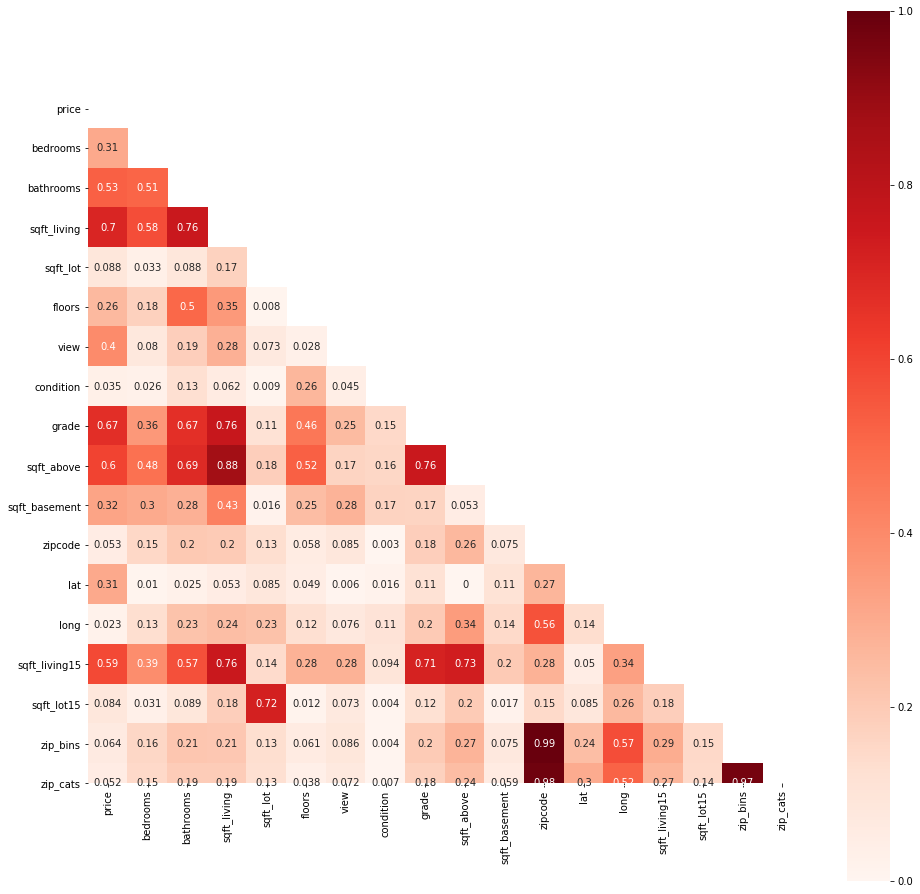

In [51]:
multiplot(np.abs(kc.corr().round(3)))

#### notes :

zip_code needs to be edited out from model when evaluating 



Highly correlated variables:
    - Grade
    - sft_above
    - sft_living15 is on the fence...maybe normalize that one before dropping? it's slightly correlated with price and highly correlated with sqft
      
long lat have low correlations... even with price... dropping 


ValueError: supplied range of [-inf, 8.480529207044645] is not finite

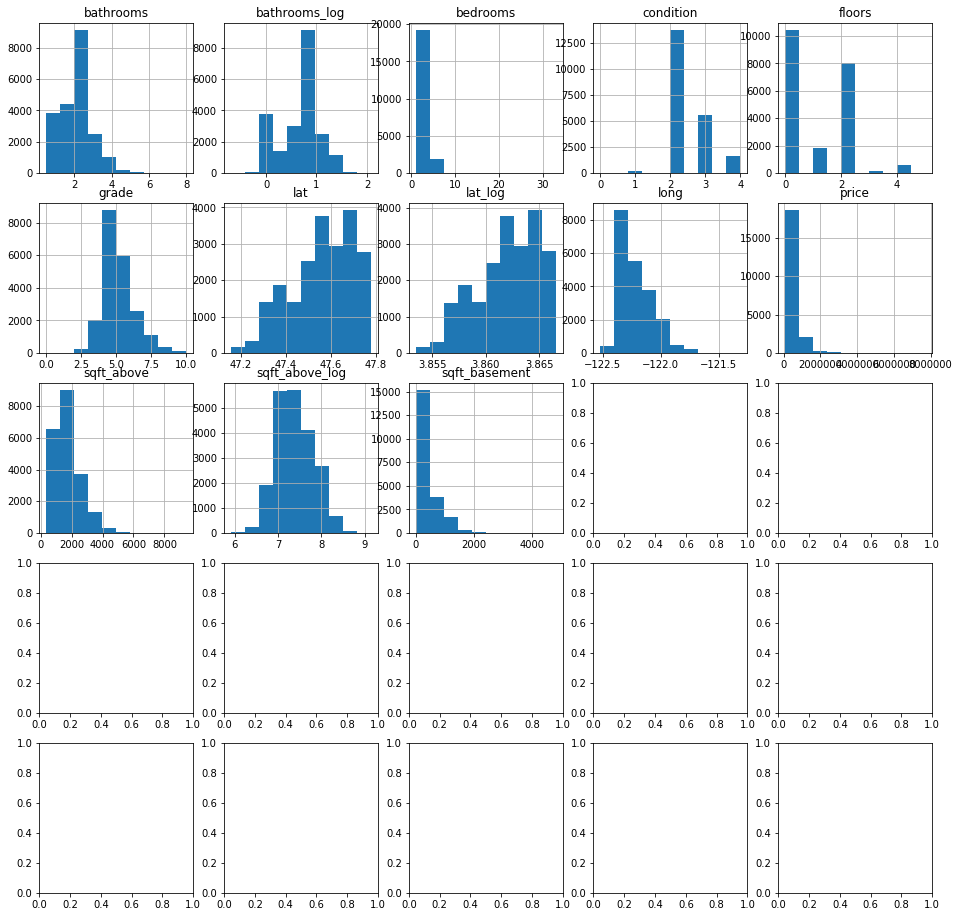

In [62]:
kc.hist();

(<Figure size 1152x1152 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2a2206db5f8>)

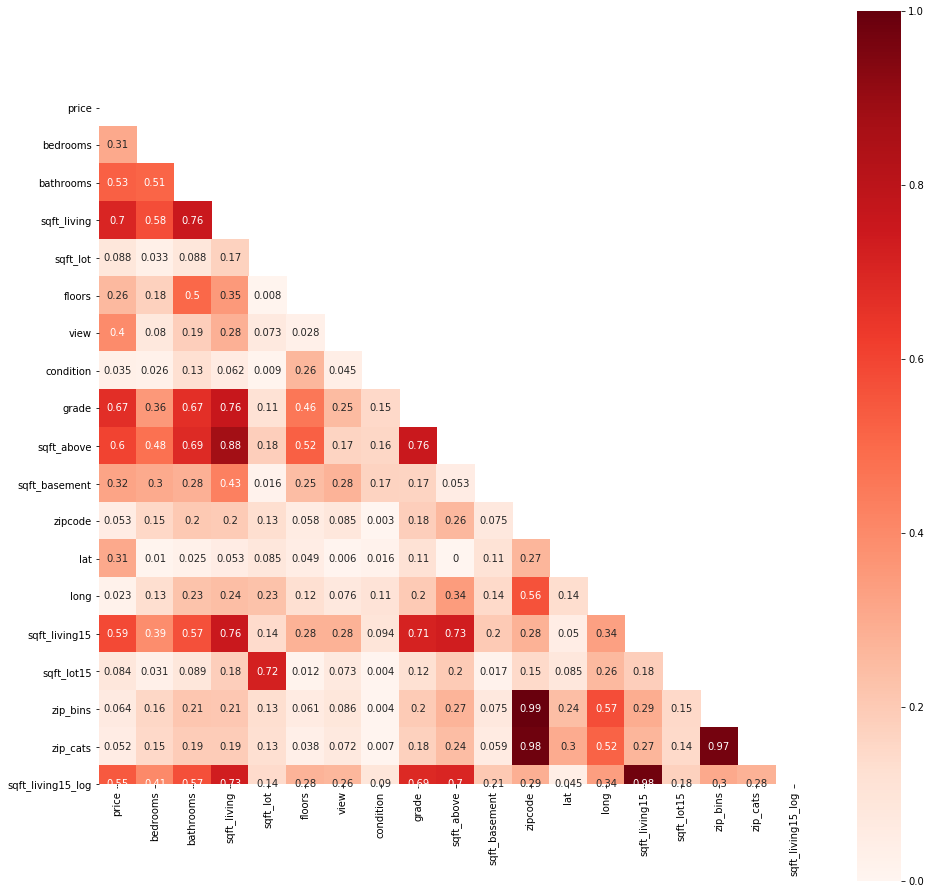

In [76]:
multiplot(np.abs(kc.corr().round(3)))

## Normalizing

In [60]:
log_cols = ['']

for col in log_cols:
    kc[col+ '_log'] = np.log(kc[col])

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = ['these are ones that need to be scaled']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(kc[num_cols])

## Dropping

In [ ]:
#drop_cols = ['col1','col2']
#kc.drop(drop_cols,axis=1,inplace=True)


# Model

In [ ]:
# Importing necessary tools
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [ ]:
#building calling the appropriate columns to build model with:
#cols = kc.drop(["those that don't apply"], axis=1).columns
#str_cols = '  + '.join(cols)
#str_cols

In [ ]:
#build formula
#formula = 'price'~+str_cols
#formula

In [ ]:
#modeling
#model = smf.ols(formula=formula, data=df).fit()
#model.summary

## Fit Testing: QQ Plot and Scatter

In [ ]:
#resids = model.resid
#import scipy.stats as stats

#sm.graphics.qqplot(resids, stats.norm, line = '45')

In [ ]:
#def scatter_mean()
#    """Plot a scatter . plot """
#    ax = model.summary(kind='scatter', x=x, y=y, figsize=figsize, title)

## Validation

In [ ]:
#from sklearn.metrics import mean_squared_error
#from sklearn.model_selection import cross_val_score
#from sklearn.linear_model import LinearRegression
#linreg = LinearRegression()

#x = kc.drop('price', axis=1).values
#y = kc('price').values

#kc_10_results = np.mean(cross_val_score(linreg, x, y, cv=10, scoring='r2'))

# Interpretation

# Conclusions and Recommendations: